In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(datafile):
    points = []
    folds = []
    with open(datafile, 'r') as fp:
        for l in fp.readlines():
            if ',' in l:
                points.append([int(i) for i in l.split(',')])
            if 'fold' in l:
                _, _, fold = l.strip().split()
                axis, pos = fold.split('=')
                folds.append([axis, int(pos)])
    return np.array(points), folds

In [10]:
points, folds = load_data("test.txt")

In [19]:
for p in points:
    print(p)

[ 6 10]
[ 0 14]
[ 9 10]
[0 3]
[10  4]
[ 4 11]
[6 0]
[ 6 12]
[4 1]
[ 0 13]
[10 12]
[3 4]
[3 0]
[8 4]
[ 1 10]
[ 2 14]
[ 8 10]
[9 0]


In [70]:
def fold(datafile):
    points, folds = load_data(datafile)
    xsize = points[:, 0].max() + 1
    ysize = points[:, 1].max() + 1
    arr = np.zeros(ysize * xsize).reshape(ysize, xsize)
    for p in points:
        arr[p[1], p[0]] = 1
    return arr, folds

In [51]:
im, folds = fold("test.txt")

In [109]:
def fold_y(arr, y):
    upper = arr[:y, :]
    lower = np.flipud(arr[y+1:, :])
    if lower.shape[0] > upper.shape[0]:
        starty = lower.shape[0] - upper.shape[0]
        overlap = lower[starty:, :] + upper
        fold_arr = np.vstack((lower[:starty, :], overlap))
    elif lower.shape[0] < upper.shape[0]:
        starty = upper.shape[0] - lower.shape[0]
        overlap = upper[starty:, :] + lower
        fold_arr = np.vstack((upper[:starty, :], overlap))
    else:
        fold_arr = upper + lower
    return fold_arr

def fold_x(arr, x):
    left = arr[:, :x]
    right = np.fliplr(arr[:, x+1:])
    if left.shape[1] > right.shape[1]:
        startx = left.shape[1] - right.shape[1]
        overlap = left[:, startx:] + right
        fold_arr = np.hstack((left[:, :startx], overlap))
    elif left.shape[1] < right.shape[1]:
        startx = right.shape[1] - left.shape[1]
        overlap = right[:, startx:] + left
        fold_arr = np.hstack((right[:, :startx], overlap))
    else:
        fold_arr = left + right
    return fold_arr

In [110]:
test_arr = fold_x(fold_y(im, 7), 5)
test_arr = fold_y(im, 7)
test_arr[test_arr >= 1] = 1
np.unique(test_arr, return_counts=True)

(array([0., 1.]), array([60, 17]))

In [111]:
test_arr

array([[1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [119]:
im_full, folds_full = fold("input.txt")
folded = fold_x(im_full, 655)
folded[folded >=1] = 1
np.unique(folded, return_counts=True)

(array([0., 1.]), array([584297,    618]))

In [121]:
im_full, folds_full = fold("input.txt")
fold_arr = im_full.copy()

In [122]:
for fold in folds_full:
    if fold[0] == 'x':
        fold_arr = fold_x(fold_arr, fold[1])
    else:
        fold_arr = fold_y(fold_arr, fold[1])
fold_arr

array([[ 0.,  3.,  5.,  0.,  0.,  6.,  0.,  0.,  0.,  0., 29.,  7.,  3.,
         0.,  0.,  1., 16., 10.,  7.,  0.,  1.,  0.,  0.,  4.,  0.,  7.,
        18.,  8.,  4.,  0., 15.,  0.,  0., 26.,  0.,  3.,  0.,  0.,  1.,
         0.],
       [ 3.,  0.,  0.,  3.,  0.,  5.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        13.,  0., 16.,  0.,  0.,  0.,  0.,  8.,  0.,  4.,  0.,  0., 21.,
         0.,  0.,  0.,  0.,  9.,  0.,  4.,  0.,  0., 11.,  0.,  0., 10.,
         0.],
       [ 2.,  0.,  0.,  5.,  0., 16.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
        15.,  0.,  4.,  8.,  3.,  0.,  0., 21.,  4.,  0.,  0.,  0.,  2.,
         3.,  9.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  7.,  0.,  0.,  1.,
         0.],
       [10.,  6.,  3., 11.,  0.,  2.,  0.,  0.,  0.,  0.,  2., 10.,  6.,
         0.,  0., 12.,  0.,  0.,  0.,  0.,  5.,  0., 10.,  0.,  0., 11.,
         0.,  0.,  0.,  0.,  6.,  0.,  6.,  0.,  0., 17.,  0.,  0.,  3.,
         0.],
       [11.,  0.,  0.,  8.,  0., 13.,  0.,  0.,  0.,  0.,  4.,  0., 

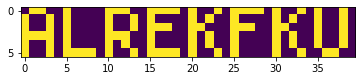

In [125]:
fold_arr[fold_arr >= 1] = 1
plt.imshow(fold_arr)